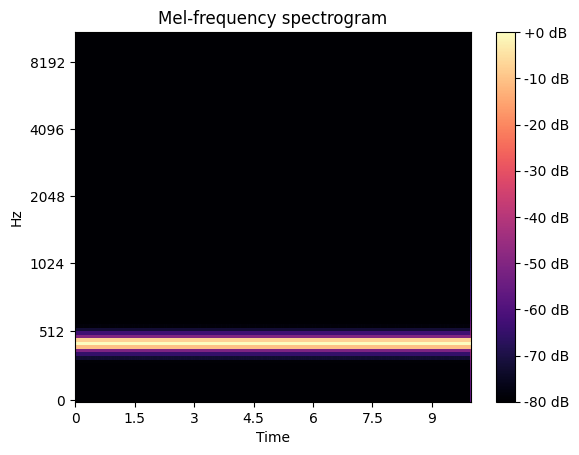

In [14]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# 音声ファイルを読み込み
y, sr = librosa.load('440Hz.wav')

# メルスペクトログラムの計算
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)

# メルスペクトログラムの表示
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()


In [16]:
y

array([ 0.01067996,  0.1229127 ,  0.24931312, ..., -0.36637452,
       -0.24931318, -0.12291279], shape=(220500,), dtype=float32)

### dummy wav 生成

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import librosa
import wave
import struct

# パラメータ
# --------------------------------------------------------------------------------------------------------------------
A=1#振幅
fs = 44100#サンプリング周波数
f0 = 440#基本周波数(今回はラ)
sec = 10 #秒

# sin波
# --------------------------------------------------------------------------------------------------------------------
def create_wave(A,f0,fs,t):#A:振幅,f0:基本周波数,fs:サンプリング周波数,再生時間[s]
    #nポイント
    #--------------------------------------------------------------------------------------------------------------------
    point = np.arange(0,fs*t)
    sin_wave =A* np.sin(2*np.pi*f0*point/fs)

    sin_wave = [int(x * 32767.0) for x in sin_wave]#16bit符号付き整数に変換
    
    #バイナリ化
    binwave = struct.pack("h" * len(sin_wave), *sin_wave)

    #サイン波をwavファイルとして書き出し
    w = wave.Wave_write("440Hz.wav")
    p = (1, 2, fs, len(binwave), 'NONE', 'not compressed')#(チャンネル数(1:モノラル,2:ステレオ)、サンプルサイズ(バイト)、サンプリング周波数、フレーム数、圧縮形式(今のところNONEのみ)、圧縮形式を人に判読可能な形にしたもの？通常、 'NONE' に対して 'not compressed' が返されます。)
    w.setparams(p)
    w.writeframes(binwave)
    w.close()
create_wave(A, f0, fs, sec) 



In [ ]:
import numpy as np
import scipy.io.wavfile as wavfile

# 12平均律に基づく、A4=440Hzを基準にした周波数計算
def get_frequency(note, octave):
    """
    与えられた音符とオクターブに基づいて周波数を計算する
    A4 = 440Hzを基準にして計算
    """
    # 音符名に対応する半音のオフセット
    note_offsets = {
        "C": -9, "C#": -8, "D": -7, "D#": -6, "E": -5, "F": -4,
        "F#": -3, "G": -2, "G#": -1, "A": 0, "A#": 1, "B": 2
    }
    
    # A4の周波数（基準となる）
    A4_freq = 440.0
    
    # オクターブのズレ（A4からの相対的なズレを計算）
    octave_shift = octave - 4  # A4が4オクターブにあるので、オクターブのズレを計算
    
    # 12平均律に基づく半音の比率（2^(1/12)）
    semitone_ratio = 2 ** (1 / 12)
    
    # Cからの半音のズレを計算
    semitone_offset = note_offsets[note]
    
    # 基準の周波数A4を基にして最終的な周波数を計算
    frequency = A4_freq * (semitone_ratio ** semitone_offset) * (2 ** octave_shift)
    
    return frequency

# C2からC5の音符とオクターブ
notes_and_octaves = [
    ("C", 2), ("C#", 2), ("D", 2), ("D#", 2), ("E", 2), ("F", 2), ("F#", 2), ("G", 2), ("G#", 2), ("A", 2), ("A#", 2), ("B", 2),
    ("C", 3), ("C#", 3), ("D", 3), ("D#", 3), ("E", 3), ("F", 3), ("F#", 3), ("G", 3), ("G#", 3), ("A", 3), ("A#", 3), ("B", 3),
    ("C", 4), ("C#", 4), ("D", 4), ("D#", 4), ("E", 4), ("F", 4), ("F#", 4), ("G", 4), ("G#", 4), ("A", 4), ("A#", 4), ("B", 4),
    ("C", 5)
]

# 各音符の周波数を計算
note_frequencies = {}
for note, octave in notes_and_octaves:
    note_frequencies[f"{note}{octave}"] = get_frequency(note, octave)

def generate_tone(frequency, duration, sample_rate=44100, amplitude=0.5):
    """
    与えられた周波数と長さに基づいて正弦波の音を生成する
    """
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = amplitude * np.sin(2 * np.pi * frequency * t)
    return wave

def generate_chord_wav(chord, duration=1.0, sample_rate=44100, filename="output.wav"):
    """
    コード（和音）をWAVファイルとして生成する
    """
    full_wave = np.array([])

    for note in chord:
        frequency = note_frequencies[note]
        tone = generate_tone(frequency, duration, sample_rate)
        full_wave = np.concatenate((full_wave, tone))

    # 16bit PCMとしてWAVファイルを保存
    full_wave = np.int16(full_wave * 32767)  # 音量を調整して16bitに変換
    wavfile.write(filename, sample_rate, full_wave)
    print(f"WAVファイルが{filename}として保存されました")

# 使用例: Cメジャーコード（C4, E4, G4）
chord = ["C4", "E4", "G4"]
generate_chord_wav(chord, duration=1.0, filename="C_major_chord_C4_E4_G4.wav")

# 使用例: C2からC5までの単音を生成
for note in note_frequencies:
    generate_chord_wav([note], duration=0.5, filename=f"{note}_tone.wav")


In [1]:
import numpy as np
import scipy.io.wavfile as wavfile

# 12平均律に基づく、A4=440Hzを基準にした周波数計算
def get_frequency(note, octave):
    """
    与えられた音符とオクターブに基づいて周波数を計算する
    A4 = 440Hzを基準にして計算
    """
    # 音符名に対応する半音のオフセット
    note_offsets = {
        "C": -9, "C#": -8, "D": -7, "D#": -6, "E": -5, "F": -4,
        "F#": -3, "G": -2, "G#": -1, "A": 0, "A#": 1, "B": 2
    }
    
    # A4の周波数（基準となる）
    A4_freq = 440.0
    
    # オクターブのズレ（A4からの相対的なズレを計算）
    octave_shift = octave - 4  # A4が4オクターブにあるので、オクターブのズレを計算
    
    # 12平均律に基づく半音の比率（2^(1/12)）
    semitone_ratio = 2 ** (1 / 12)
    
    # Cからの半音のズレを計算
    semitone_offset = note_offsets[note]
    
    # 基準の周波数A4を基にして最終的な周波数を計算
    frequency = A4_freq * (semitone_ratio ** semitone_offset) * (2 ** octave_shift)
    
    return frequency

# C2からC5の音符とオクターブ
notes_and_octaves = [
    ("C", 2), ("C#", 2), ("D", 2), ("D#", 2), ("E", 2), ("F", 2), ("F#", 2), ("G", 2), ("G#", 2), ("A", 2), ("A#", 2), ("B", 2),
    ("C", 3), ("C#", 3), ("D", 3), ("D#", 3), ("E", 3), ("F", 3), ("F#", 3), ("G", 3), ("G#", 3), ("A", 3), ("A#", 3), ("B", 3),
    ("C", 4), ("C#", 4), ("D", 4), ("D#", 4), ("E", 4), ("F", 4), ("F#", 4), ("G", 4), ("G#", 4), ("A", 4), ("A#", 4), ("B", 4),
    ("C", 5)
]

# 各音符の周波数を計算
note_frequencies = {}
for note, octave in notes_and_octaves:
    note_frequencies[f"{note}{octave}"] = get_frequency(note, octave)

def generate_tone(frequency, duration, sample_rate=44100, amplitude=0.5):
    """
    与えられた周波数と長さに基づいて正弦波の音を生成する
    """
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = amplitude * np.sin(2 * np.pi * frequency * t)
    return wave

def generate_chord_wav(chord, duration=1.0, sample_rate=44100, filename="output.wav"):
    """
    コード（和音）をWAVファイルとして生成する
    """
    full_wave = np.array([])

    for note in chord:
        frequency = note_frequencies[note]
        tone = generate_tone(frequency, duration, sample_rate)
        full_wave = np.concatenate((full_wave, tone))

    # 16bit PCMとしてWAVファイルを保存
    full_wave = np.int16(full_wave * 32767)  # 音量を調整して16bitに変換
    wavfile.write(filename, sample_rate, full_wave)
    print(f"WAVファイルが{filename}として保存されました")

# 使用例: C2からC5までの単音を生成
for note in note_frequencies:
    generate_chord_wav([note], duration=0.5, filename=f"{note}_tone.wav")


WAVファイルがC_major_chord_C4_E4_G4.wavとして保存されました
WAVファイルがC2_tone.wavとして保存されました
WAVファイルがC#2_tone.wavとして保存されました
WAVファイルがD2_tone.wavとして保存されました
WAVファイルがD#2_tone.wavとして保存されました
WAVファイルがE2_tone.wavとして保存されました
WAVファイルがF2_tone.wavとして保存されました
WAVファイルがF#2_tone.wavとして保存されました
WAVファイルがG2_tone.wavとして保存されました
WAVファイルがG#2_tone.wavとして保存されました
WAVファイルがA2_tone.wavとして保存されました
WAVファイルがA#2_tone.wavとして保存されました
WAVファイルがB2_tone.wavとして保存されました
WAVファイルがC3_tone.wavとして保存されました
WAVファイルがC#3_tone.wavとして保存されました
WAVファイルがD3_tone.wavとして保存されました
WAVファイルがD#3_tone.wavとして保存されました
WAVファイルがE3_tone.wavとして保存されました
WAVファイルがF3_tone.wavとして保存されました
WAVファイルがF#3_tone.wavとして保存されました
WAVファイルがG3_tone.wavとして保存されました
WAVファイルがG#3_tone.wavとして保存されました
WAVファイルがA3_tone.wavとして保存されました
WAVファイルがA#3_tone.wavとして保存されました
WAVファイルがB3_tone.wavとして保存されました
WAVファイルがC4_tone.wavとして保存されました
WAVファイルがC#4_tone.wavとして保存されました
WAVファイルがD4_tone.wavとして保存されました
WAVファイルがD#4_tone.wavとして保存されました
WAVファイルがE4_tone.wavとして保存されました
WAVファイルがF4_tone.wavとして保存されました
WAVファイルがF#4_tone.wavとして保存されました
WAVファイルがG4_t

変更点と説明:
音符の周波数計算:

get_frequency関数を追加しました。この関数は、音符（例えばC, D, Eなど）とオクターブを受け取り、その音の周波数を計算します。

オクターブを考慮して、A4 = 440Hzからの相対的な変化を計算しています。12平均律に従い、半音ごとの周波数比（2^(1/12)）を使って計算します。

音階のリスト（C2〜C5）:

notes_and_octavesリストにC2からC5までの音符とそのオクターブを指定しています。各音符についてその周波数を計算し、note_frequenciesに格納します。

音符から和音の生成:

generate_chord_wav関数を使って、指定した音符の和音（例えば、C4, E4, G4）を生成することができます。

出力例:

C4（中央のC）やE4, G4を使ってCメジャーコードを生成し、ファイルに保存します。

C2からC5までの単音を各々WAVファイルとして保存します（各音符ごとに個別のファイルが生成されます）。

実行結果:
実行後に、C2からC5の音符がそれぞれWAVファイルとして保存され、必要な音を生成できます。例えば、C4_tone.wav、D3_tone.wavなどのファイルが出力されます。

### コード別音声生成